┌ Info: Saved animation to 
│   fn = C:\Users\karol\Desktop\programowanie\animacja.gif
└ @ Plots C:\Users\karol\.julia\packages\Plots\kyYZF\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\karol\\Desktop\\programowanie\\animacja.gif")
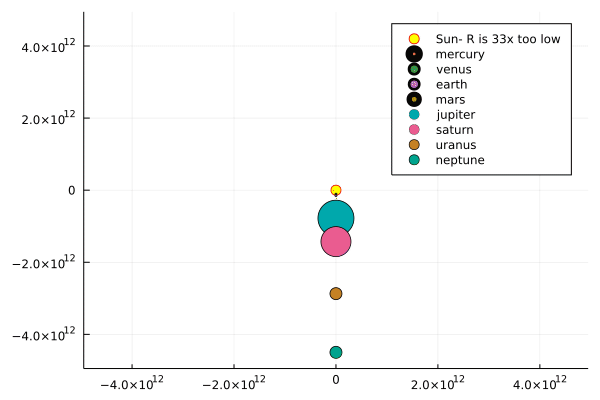

In [10]:
# Główny program do obliczania położenia ciał ( dla ukladu slonecznego )

using Plots, AstroLib


#podaj ilosc planet. Na razie moze byc 7 (pelna lista planet bez Pluto) lub 4

NoPlanets = 8

# Uwaga to jest delta t - im wieksza to obliczenia mniej dokladne ale nie moze byc za mala bo komp tego nie udzwignie albo nie bedzie widac ruchu
Deltat = 1*24*60*60


# Ważne stałe
G = 6.6732*10^(-11)     # stała grawitacji 
MS = 1.99e30    #masa slonca
RS = 695000000.0 #promień slonca
scale = 700.0 # o tye razy powiekszamy promien planet w skali gdzie promien sun ma wielkosc 1
scales = 20.0 #o tye razy powiekszamy promien slonca w skali gdzie promien sun ma wielkosc 1





#lista planet które chcemy wyswietlić - mozna pozniej zautomatyzwac zaladowanie slowniknów
#planet_names = ["earth", "mars", "venus", "mercury"]

if NoPlanets == 8
    planet_names = ["mercury", "venus", "earth", "mars","jupiter","saturn","uranus","neptune"]
    scale = 200.0 # jupiter jest tak duzy ze trzeba zmienic skale
    scales = 6.0 # odleglosci sa tak duze ze trzeba zmniejszyc slonce by mercury nie wpadal na slonce
elseif NoPlanets == 4
    planet_names = ["mercury", "venus", "earth", "mars"]
else
    print("liczba planet moze byc rowna 8 lub 4")
    throw(DomainError(NoPlanets, "liczba planet musi byc 4 lub 8"))
end

#dla listy planet bierzemy dane z AstroLib
function get_axis(planet_names)
    [AstroLib.planets[i].axis for i in planet_names]
end

function get_mass(planet_names)
   [AstroLib.planets[i].mass for i in planet_names]
end

function get_radius(planet_names)
    [AstroLib.planets[i].radius for i in planet_names]
end

masses = get_mass(planet_names)
axis = get_axis(planet_names)
radius = get_radius(planet_names)

# nie mamy predkosci startowej  w astrolib zatem definujemy sami (dane z googla) Dict velocity dla planet.

velocity = Dict{String,Float64}()

for i in AstroLib.planets
    push!(velocity,i[1] => 0.0)
end

push!(velocity,"earth" => 30e3)
push!(velocity,"mars" => 24e3)
push!(velocity,"venus" => 35e3)
push!(velocity,"mercury" => 45e3)
push!(velocity,"jupiter" => 13e3)
push!(velocity,"saturn" => 9.6e3)
push!(velocity,"uranus" => 6.8e3)
push!(velocity,"neptune" => 5.4e3)

#wyznaczamy granice wykresu dla najdalszej planety 
xlimit= 1.1 .* maximum(axis) 

#skalowanie planet sluży tylko do ich pokazania, tzn jowisz może wyjść większy od słońca wiec trzeba nad tym popracować
Planeta1 = Dict("M" => masses[1], 
    "position" => [-axis[1],0], 
      "moment_vec" => masses[1] * [0,get(velocity,planet_names[1],1)],"radiusscaled" => radius[1]/RS*scale)

#sqrt(G*masses[1]^2/(axis[1]*(MS+masses[1])))


Sun1 = Dict("M" => MS, "position" => [0.0,0.0], "moment_vec" => [0.0,0.0],"radiusscaled" => scales)

Planeta2 = Dict("M" => masses[2], "position" => [0,-axis[2]],"moment_vec" => masses[2]* [-get(velocity,planet_names[2],1),0]
,"radiusscaled" => radius[2]/RS*scale)
#-sqrt(G*masses[2]^2/(axis[2]*(MS+masses[2])))
Planeta3 = Dict("M" => masses[3], "position" => [0,-axis[3]],"moment_vec" => masses[3]* [-get(velocity,planet_names[3],1),0]
,"radiusscaled" => radius[3]/RS*scale)
Planeta4 = Dict("M" => masses[4], "position" => [0,-axis[4]],"moment_vec" => masses[4]* [-get(velocity,planet_names[4],1),0]
,"radiusscaled" => radius[4]/RS*scale)

if NoPlanets == 8

    Planeta5 = Dict("M" => masses[5], "position" => [0,-axis[5]],"moment_vec" => masses[5]* [-get(velocity,planet_names[5],1),0]
    ,"radiusscaled" => radius[5]/RS*scale)
    Planeta6 = Dict("M" => masses[6], "position" => [0,-axis[6]],"moment_vec" => masses[6]* [-get(velocity,planet_names[6],1),0]
    ,"radiusscaled" => radius[6]/RS*scale)
    Planeta7 = Dict("M" => masses[7], "position" => [0,-axis[7]],"moment_vec" => masses[7]* [-get(velocity,planet_names[7],1),0]
    ,"radiusscaled" => radius[7]/RS*scale)
    Planeta8 = Dict("M" => masses[8], "position" => [0,-axis[8]],"moment_vec" => masses[8]* [-get(velocity,planet_names[8],1),0]
    ,"radiusscaled" => radius[8]/RS*scale)
    #uwaga jak dolozymy planete trzeba uzupelnic slownik oraz dopisac do listy ponizej
end

#---------------------------------------------------------------------------------------------
#       Dodaj Planety (Planeta1.8 do listy
#---------------------------------------------------------------------------------------------


if NoPlanets == 8

    lista=[Sun1, Planeta1 , Planeta2, Planeta3, Planeta4, Planeta5,Planeta6,Planeta7,Planeta8]

else

    lista=[Sun1, Planeta1 , Planeta2, Planeta3, Planeta4]
end
#---------------------------------------------------------------------------------------------
#       FUNKCJE DO OBLICZEŃ 
#---------------------------------------------------------------------------------------------

dist_vec(coord1,coord2) = coord2 .- coord1
"""Wylicza wektor odległości z coord1 do coord2"""

vec_length(v::Array) = sqrt(sum(v.^2))
"""Wylicza długość wektora"""

F_gravity(M1::Number,M2::Number,r::Array) = (G*M1*M2/vec_length(r)^3).*r
"""Wylicza wektor siły grawitacji"""


        


#-------------------------------------------------------------------------------------------
#               RYSOWANIE WYKRESU
#-------------------------------------------------------------------------------------------



fps = 20          # ilość kaltek na sekundę w symulacji

                  
t = 1:2000         #ilość klatek


symulation = @animate for k in t
    # rysuj slonce
    scatter([lista[1]["position"][1]],[lista[1]["position"][2]],
    xlim = (-xlimit,xlimit),
    ylim = (-xlimit,xlimit),
    markersize = lista[1]["radiusscaled"],
    label = string("Sun", "- R is ", floor(Int,scale/scales), "x too low"  ),
    markercolor = :yellow,
    markerstrokecolor = :red,
    legend = :topright)
    #rysuj pozostałe planety
    for j in 2:length(lista)
        name = planet_names[j-1]  
        scatter!([lista[j]["position"][1]],[lista[j]["position"][2]],
        markersize = lista[j]["radiusscaled"],
        label = name)
        
    end    
    
    #zaczynamy obliczenia od sily grawitacji
    
      for i in 1 : length(lista)
        FG=[0.0,0.0]
            #oblicz siłe przeciągania dla planety i
           for j in 1:length(lista)
               if j!=i
                 r=dist_vec(get(lista[i],"position",1),get(lista[j],"position",1))
                 F=F_gravity(get(lista[i],"M",1),get(lista[j],"M",1),r)
                FG .+= F
                end
            end 
        #updtejtuj wektor momentu pędu dla i=tej planety
        lista[i]["moment_vec"] = lista[i]["moment_vec"] .+ FG*Deltat
      end
      for i in 1 : length(lista)
      
        #updejtuj wektor pozycji dla i-tej planety
        lista[i]["position"] = lista[i]["position"] .+ lista[i]["moment_vec"]*Deltat/lista[i]["M"]
         
            
      end

end

gif(symulation,"animacja.gif",fps=fps)